### Projeto - Redes Convolucionais

Fazer no Colab: https://colab.research.google.com/drive/1S7NH-jVR-kB84vvxr-bWd7LfkO8lLyLn

No Kaggle: https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset

notebook: https://www.kaggle.com/code/yosshi999/oxfordiiit-pet-classification

https://www.kaggle.com/code/sarthakh/data-loading-cnn-and-transfer-learning-with-tf

Na disciplina foram vistos diferentes conceitos e arquiteturas de redes convolucionais. O uso de cada abordagem depende principalmente do problema e da base de dados. Sendo assim, esse projeto tem como objetivo avaliar os conhecimentos de diferentes partes do conteúdo. Para isso, deverão ser desenvolvidas nesse notebook:

1 - Uma arquitetura de rede CNN implementada pelo próprio aluno

2 - Utilização de uma arquitetura de rede proposta na literatura (e.g. ResNet, VGG, EfficientNet) por meio de modelos pré-treinados

3 - Utilização de uma arquitetura de rede proposta na literatura (e.g. ResNet, VGG, EfficientNet), realizando treinamento dessa rede

### A Base de dados

Para desenvolver o projeto, será utilizado o dataset [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Este dataset possui diferentes raças de cachorros e gatos, conforme ilustrado na figura baixo.

![Title](breeds.png)

We have created a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

Para essa base de dados, os pontos 1,2 e 3 descritos no tópico anterior deverão ser realizados para desenvolver duas soluções:

1 - Um classificador de gatos e cachorros

2 - Um classificador de raças de animais 

OBS: O ponto 2, a princípio, deverá ser realizado com todas as raças de gatos e cachorros. Entretanto, caso desejem, podem dividir o problema em duas redes: uma para raças de gatos e outra para raças de cachorros. 


### Critérios de Avaliação

Serão tidos como critérios de avaliação:

* A implementação das soluções descritas
* Descrição da análise e comparação de resultados de cada solução

### Solução 1 - Classificador de gatos e cachorros

Para implementação dessa solução, as seguintes etapas deverão ser realizadas:

1 - Leitura da base de dados (recomendado utilizar as funções do Keras de leitura em Batch https://keras.io/api/preprocessing/image/)

2 - Visualização de imagens do dataset. Como você avalia as imagens desta base de dados para cada classe?

3 - Quais as dimensões e quantos canais de cores possuem a imagem?

4 - Implementação de pelo menos uma arquitetura de rede CNN: 

  * Qual o desempenho da rede? (métrica de classificação a critério do aluno)
  * A rede apresenta overfiting ou underfiting? 
  
5 - Utilize a base de dados em tons de cinza e realize o treinamento novamente da arquitetura proposta no ponto anterior. Existe alguma diferença de desempenho da rede?

6 - Escolha uma arquitetura de rede proposta na literatura (disponíveis em https://keras.io/api/applications/)

* Utilizando a rede escolhida de forma pré-treinada, qual o desempenho desta arquitetura para este problema?
* A rede apresenta overfiting ou underfiting?
* Descongele parcialmente a rede escolhida, foi observada mudança de desempenho do modelo?
* Adicione camadas na rede, foi observada mudança de desempenho do modelo?
* Descongele totalmente a rede escolhida, foi observada mudança de desempenho do modelo?

### Solução 2 - Classificar raças de animais

1 - Implementação de pelo menos uma arquitetura de rede CNN: 

  * Qual o desempenho da rede? (métrica de classificação a critério do aluno)
  * A rede apresenta overfiting ou underfiting? 

2 - Escolha uma arquitetura de rede proposta na literatura (disponíveis em https://keras.io/api/applications/)

* Utilizando a rede escolhida de forma pré-treinada, qual o desempenho desta arquitetura para este problema?
* A rede apresenta overfiting ou underfiting?
* Descongele parcialmente a rede escolhida, foi observada mudança de desempenho do modelo?
* Adicione camadas na rede, foi observada mudança de desempenho do modelo?
* Descongele totalmente a rede escolhida, foi observada mudança de desempenho do modelo?

3 - Escolha pelo menos uma arquitetura de rede dos tópicos 1 ou 2 e utilize técnicas de oversampling (https://keras.io/api/preprocessing/image/ ou https://albumentations.ai) nesta rede. Como você avalia o desempenho do modelo realizando o oversampling?

4 - Escolha o melhor modelo de rede desenvolvido nos tópicos anteriores e analise os resultados:
  * Qual o desempenho do modelo para cada raça?
  * Quais raças possuem menor desempenho? 
  * Existe algum pre-processamento que você acredite que possa melhorar o desempenho do modelo para estas raças de menor desempenho?

In [54]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

In [82]:
# https://www.kaggle.com/code/yosshi999/oxfordiiit-pet-classification
import glob

# Localização de todas as imagens
dir_name="../../../Projeto Redes Neurais/images/*"

# Para puxar os nomes dos arquivos
pets_files = glob.glob(dir_name) 

# Criando as colunas do dataframe
pets_df = pd.DataFrame(pets_files)
pets_df["file_name"] = pets_df[0].map(lambda x: x.split("\\")[1])
pets_df["class"] = pets_df["file_name"].map(lambda x: x.split("_")[0])
pets_df["path"] = pets_df["file_name"].map(lambda x: f"../../../Projeto Redes Neurais/images/{x}")
pets_df.drop(columns = [0], inplace = True)

In [83]:
pets_df

,file_name,class,path
0,Abyssinian_1.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...
1,Abyssinian_10.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...
2,Abyssinian_100.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...
3,Abyssinian_100.mat,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...
4,Abyssinian_101.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...
...,...,...,...
7388,yorkshire_terrier_95.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...
7389,yorkshire_terrier_96.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...
7390,yorkshire_terrier_97.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...
7391,yorkshire_terrier_98.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...


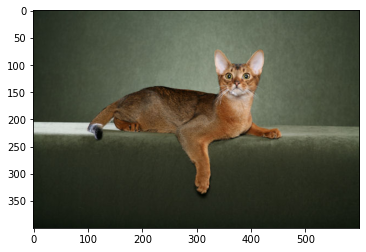

In [80]:
# Chacando a visualização da Imagem
from PIL import Image

img = Image.open(pets_df["path"][0])
plt.imshow(img)
plt.show()

In [84]:
# com a lista trainval e test, já temos a divisão dos datasets de treino e teste

In [86]:
# para modelos: https://www.kaggle.com/code/sarthakh/data-loading-cnn-and-transfer-learning-with-tf
# https://www.kaggle.com/code/yagyeshb/data-loading-cnn-and-transfer-learning-with-tf

In [1]:
# transformar a imagem em um vetor (180,180,3)